In [1]:
!pip install sklearn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [0]:
df = load_boston()

In [5]:
type(df)

sklearn.utils.Bunch

In [7]:
df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
df = dict(df)

In [10]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [30]:
print(df['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
df['filename']

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [15]:
feature_names = df['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
data = pd.DataFrame(df['data'],columns = df['feature_names'])
labels = df['target']

In [32]:
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

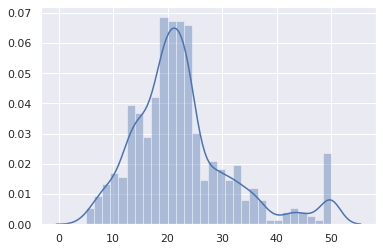

In [33]:
sns.set()
sns.distplot(labels,bins = 30)
plt.show()

```Target labels are distributed normally to some extent```

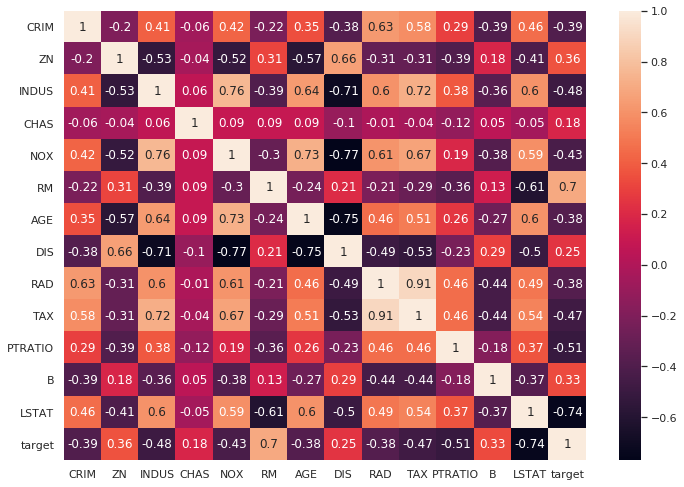

In [35]:
def draw_heatmap(data,labels):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    data['target'] = labels
    correlation_matrix = data.corr().round(2)
    sns.heatmap(data=correlation_matrix,annot=True)
    
draw_heatmap(data,labels)

Observations:


*   To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).


*   An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

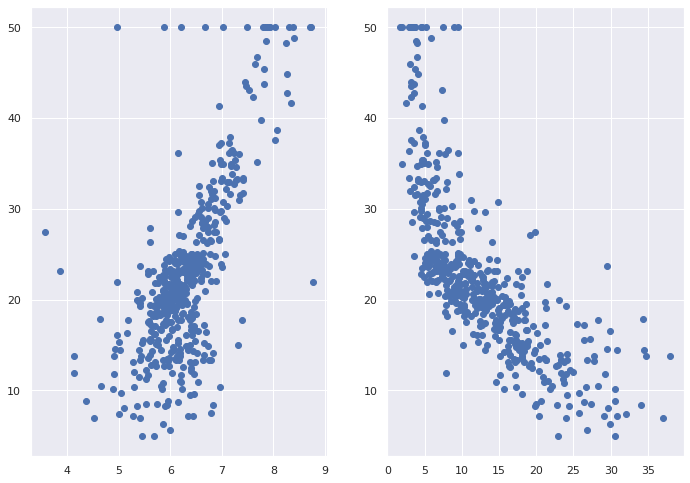

In [36]:
plt.subplot(1,2,1)
plt.scatter(data.RM,data.target)
plt.subplot(1,2,2)
plt.scatter(data.LSTAT,data.target)
plt.show()

In [0]:
X = pd.DataFrame(np.c_[data.LSTAT,data.RM],columns=['LSTAT','RM'])
Y = data.target

In [0]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_labels,test_labels = train_test_split(X,Y,test_size = 0.3,random_state = 42 )

In [39]:
train_data

,LSTAT,RM
5,5.21,6.430
116,12.04,6.176
45,10.21,5.682
16,6.58,5.935
468,18.13,5.926
...,...,...
106,18.66,5.836
270,13.00,5.856
348,5.99,6.635
435,23.27,6.629


In [40]:
train_labels

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: target, Length: 354, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_reg = LinearRegression()
lin_reg.fit(train_data,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
def model_evaluation(lin_reg,data,labels):
    y_predict = lin_reg.predict(data)
    rmse = np.sqrt(mean_squared_error(labels,y_predict))
    r2 = r2_score(labels,y_predict)
    print("-"*20)
    print("RMSE :",rmse)
    print("R2 Score :",r2)
    print('\n')
print('Training Data Evaluation:')
model_evaluation(lin_reg,train_data,train_labels)
print("Test Data Evaluation:")
model_evaluation(lin_reg,test_data,test_labels)

Training Data Evaluation:
--------------------
RMSE : 5.557293000952383
R2 Score : 0.6486379416291157


Test Data Evaluation:
--------------------
RMSE : 5.46042834691954
R2 Score : 0.5998518447715597


